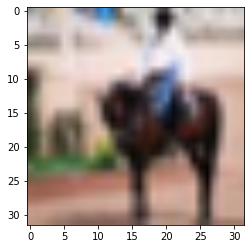

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]] [[2.21033495e-12 1.98968011e-10 6.58891561e-09 8.02694246e-08
  3.59742603e-07 5.93115282e-07 3.59742603e-07 8.02694246e-08
  6.58891561e-09 1.98968011e-10 2.21033495e-12]
 [1.98968011e-10 1.79105296e-08 5.93115282e-07 7.22562334e-06
  3.23829971e-05 5.33905362e-05 3.23829971e-05 7.22562334e-06
  5.93115282e-07 1.79105296e-08 1.98968011e-10]
 [6.58891561e-09 5.93115282e-07 1.96412806e-05 2.39279782e-04
  1.07237759e-03 1.76805174e-03 1.07237759e-03 2.39279782e-04
  1.96412806e-05 5.93115282e-07 6.58891561e-09]
 [8.02694246e-08 7.22562334e-06 2.39279782e-04 2.91502450e-03
  1.30642335e-02 2.15392796e-02 1.30642335e-02 2.91502450e-03
  2.39279782e-04 7.22562334e-06 8.02694246e-08]
 [3.59742603e-07 3.23

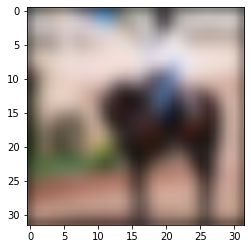

5 3


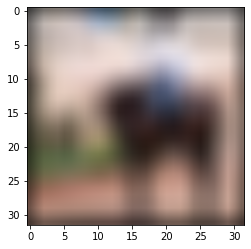

5 5


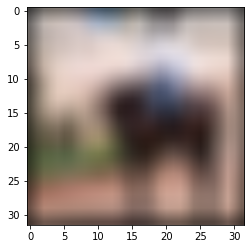

11 1


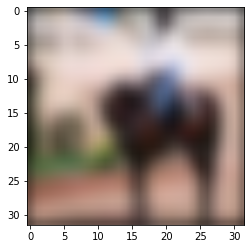

11 3


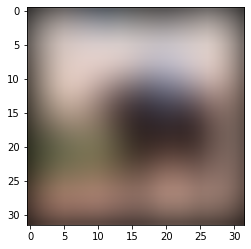

11 5


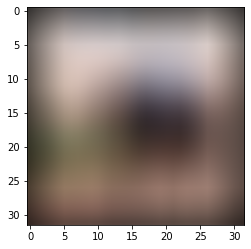

15 1


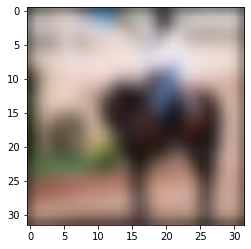

15 3


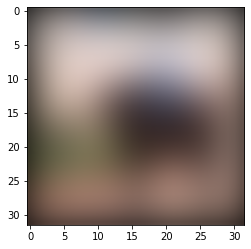

15 5


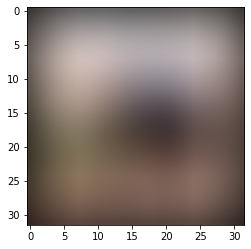

In [84]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import numpy
import math


def gaussian(shape, sigma):
  s = (shape[0] - 1)/2
  t = (shape[1] - 1)/2
  
  y, x = np.ogrid[-s:s+1, -t:t+1]

  filter = np.exp(-(x * x + y * y) / (2. * sigma * sigma)) / (2. * math.pi * sigma * sigma)
  sum = filter.sum()
  filter /= sum

  return filter

def padding(img, shape):
  newImg = np.zeros(shape, dtype=float)
  space0 = (shape[0] - img.shape[0]) // 2
  space1 = (shape[1] - img.shape[1]) // 2
  
  for i in range(space0, shape[0] - space0):
    for j in range(space1, shape[1] - space1):
      for f in range(3):
        newImg[i][j][f] = img[i-space0][j-space1][f]
  
  return newImg

def convolution(img, filter):
  newShape = (filter.shape[0]//2*2 + img.shape[0], filter.shape[1]//2*2 + img.shape[1], 3)
  oldShape = img.shape

  # 이미지 패딩
  img = padding(img, newShape)

  conv = np.zeros(oldShape, dtype=np.float32)

  for i in range(oldShape[0]):
    for j in range(oldShape[1]):
      for f in range(oldShape[2]):
        conv[i][j][f] = np.sum(np.multiply(filter, img[i:i+filter.shape[0], j:j+filter.shape[1], f]))

  return conv


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


m = [5, 11, 15]
s = [1, 3, 5]
img = x_train[11].astype('float32') / 255.0
plt.imshow(img, interpolation="bilinear")
plt.show()

filter1 = gaussian((5,5), 1)
filter2 = gaussian((11, 11), 1)

for i in range(3):
  for j in range(3):
    print(m[i], s[j])
    filter = gaussian((m[i], m[i]), s[j])
    output = convolution(img, filter)
    
    plt.imshow(output, interpolation="bilinear")
    plt.show()




